# Cafeteria Robótica em LA - Análise para Investidores

# Conteúdo <a id='back'></a>

* [1) Objetivo do Projeto](#projectgoal)
* [2) Preparação dos Dados](#data_preprocessing)
* [3) Análise dos Dados](#data_analysis)
* [4) Conclusões Gerais e Recomendações](#endandrecommmendations)
* [5) Apresentação](#presentation)


# Objetivo do Projeto 

O objetivo desse projeto é pesquisar as condições atuais do mercado e saber se o negócio conseguirá manter seu sucesso quando a novidade de garçons robôs esmorecer para provar o valor do negócio à possíveis investidores que priorizam o impulso de dividendos.

# Preparação dos Dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats
import requests
import re # Carregando todas as bibliotecas

In [2]:
cafe_df = pd.read_csv('/datasets/rest_data_us_upd.csv', sep = ',')

In [3]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
cafe_df.head(10)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [5]:
print(cafe_df.isna().sum()) #calculando o número de valores ausentes de visits_df

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


Os valores ausentes estão presentes pelas possíveis razões de desconhecimento dos dados, dados a serem preenchidos ou por falha nos preenchimentos de dados. De qualquer modo, deixaremos os valores ausentes presentes no DataFrame para que não seja introduzido nenhum viés. 

In [6]:
print(cafe_df.duplicated().sum()) #Contando duplicados explícitos de visits_df

0


Não há valores duplicados no arquivo de dados.

# Análise dos Dados

Vamos começar com essas análises. Primeiro, analisaremos a distribuição dos tipos de estabelecimentos.

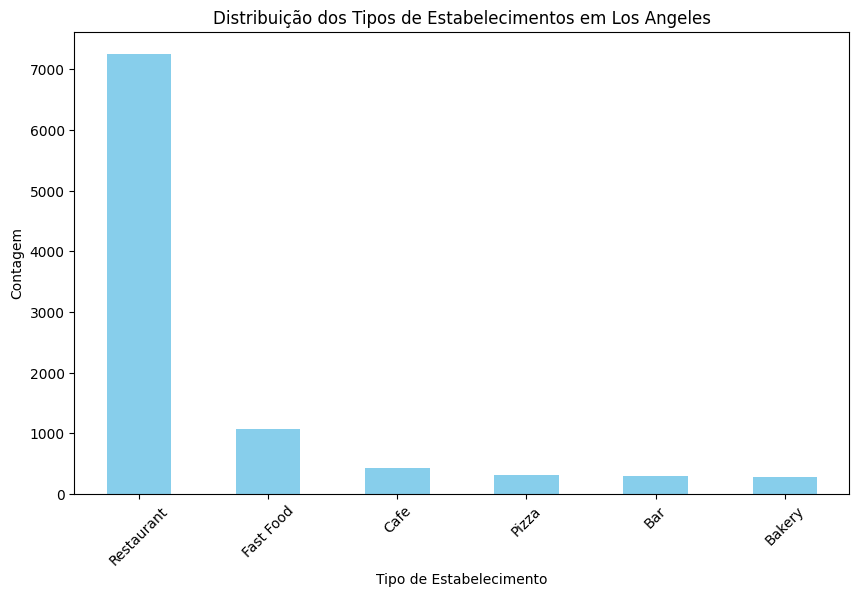

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64


In [7]:
# Contar a distribuição dos tipos de estabelecimentos
type_distribution = cafe_df['object_type'].value_counts()

# Plotar a distribuição dos tipos de estabelecimentos
plt.figure(figsize=(10, 6))
type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Tipos de Estabelecimentos em Los Angeles')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

print(type_distribution)

Essa análise inicial mostra que a maioria dos estabelecimentos são restaurantes, seguidos por fast foods e cafés. 

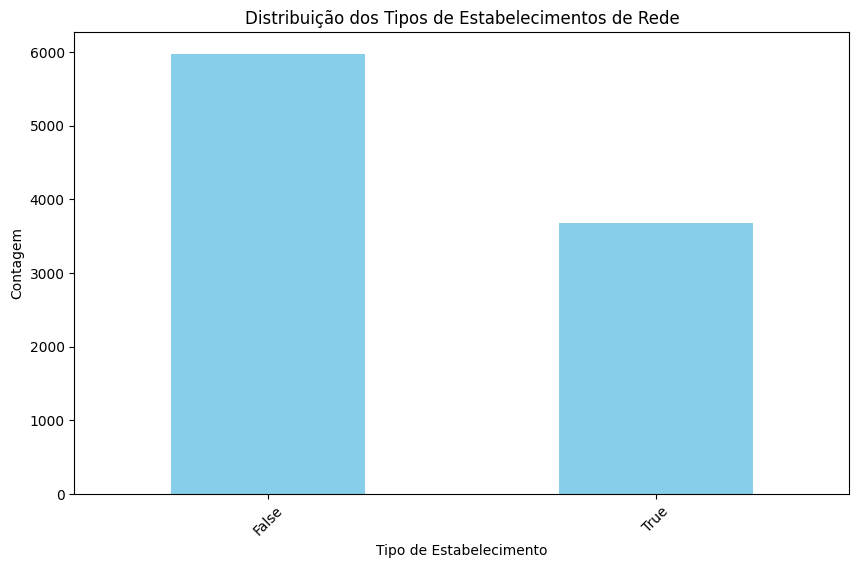

False    5972
True     3676
Name: chain, dtype: int64


In [8]:
# Contar a distribuição dos tipos de estabelecimentos
chain_distribution = cafe_df['chain'].value_counts()

# Plotar a distribuição dos tipos de estabelecimentos
plt.figure(figsize=(10, 6))
chain_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Tipos de Estabelecimentos de Rede')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

print(chain_distribution)

O número de estabelecimentos que não são de rede é muito maior dos que são de rede. Vamos descobrir a relação do tipo de estabelecimento para redes. 

In [9]:
# Filtrando por redes e não redes
chain = cafe_df[cafe_df['chain'] == True]
no_chain= cafe_df[cafe_df['chain'] == False]

# Contar o número de estabelecimentos em cada tipo para redes e não redes
counting_chain = chain['object_type'].value_counts()
counting_no_chain = no_chain['object_type'].value_counts()

# Calcular a proporção de redes em cada tipo de estabelecimento
proporcion_chain = counting_chain / (counting_chain + counting_no_chain)*100


print(proporcion_chain)

Bakery              NaN
Bar           26.369863
Cafe          61.149425
Fast Food     56.754221
Pizza         47.962382
Restaurant    31.600717
Name: object_type, dtype: float64


Café e Fast Foods são os estabelecimentos que mais existem em redes. Como uma cafeteria com garçons robôs, você está entrando em um mercado onde mais da metade dos estabelecimentos são redes. Isso pode ser um ponto positivo, pois indica que o modelo de rede/franquia é bem estabelecido e aceito pelos consumidores nesse segmento.

In [10]:
# Descrição estatística do número de assentos para redes e não redes
description_chain = chain['number'].describe()
description_no_chain = no_chain['number'].describe()

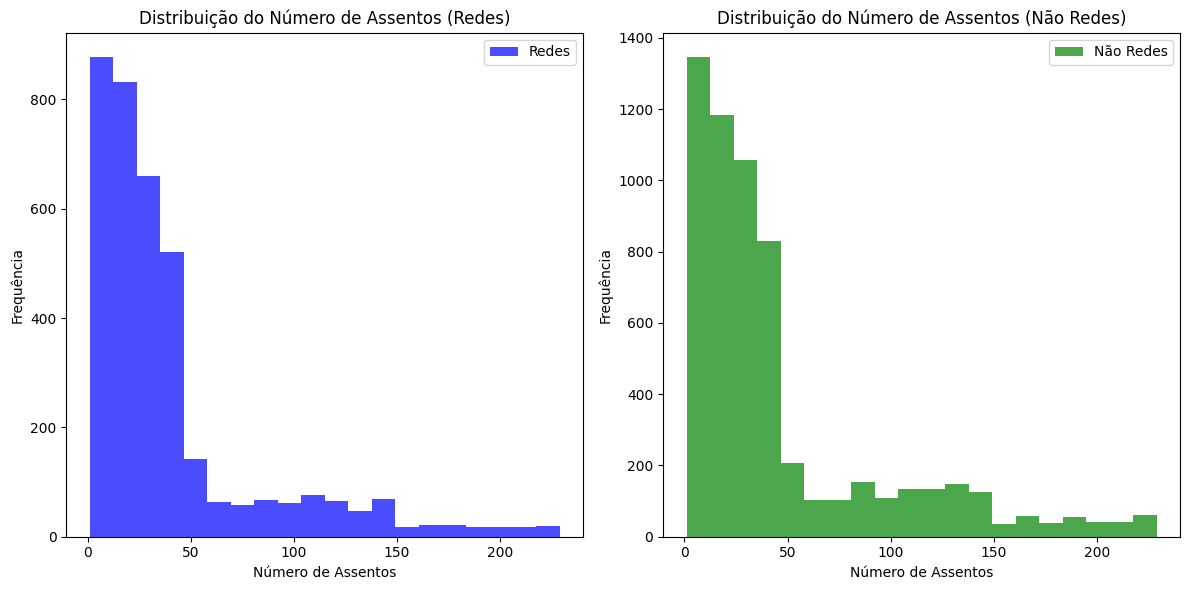

Descrição Estatística - Redes
count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

Descrição Estatística - Não Redes
count    5972.000000
mean       46.171467
std        49.875746
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64


In [11]:
# Plotar a distribuição do número de assentos para redes e não redes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(chain['number'], bins=20, color='blue', alpha=0.7, label='Redes')
plt.title('Distribuição do Número de Assentos (Redes)')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(no_chain['number'], bins=20, color='green', alpha=0.7, label='Não Redes')
plt.title('Distribuição do Número de Assentos (Não Redes)')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()


print("Descrição Estatística - Redes")
print(description_chain)
print("\nDescrição Estatística - Não Redes")
print(description_no_chain)

Estabelecimentos que são parte de redes tendem a ter, em média, menos assentos (39.69) comparado a não redes (46.17). Redes tendem a ter mais estabelecimentos com um número menor de assentos comparado a estabelecimentos independentes. Isso sugere que o modelo de redes pode estar mais focado em criar várias unidades menores, possivelmente para otimizar custos operacionais e alcançar uma maior presença geográfica. 

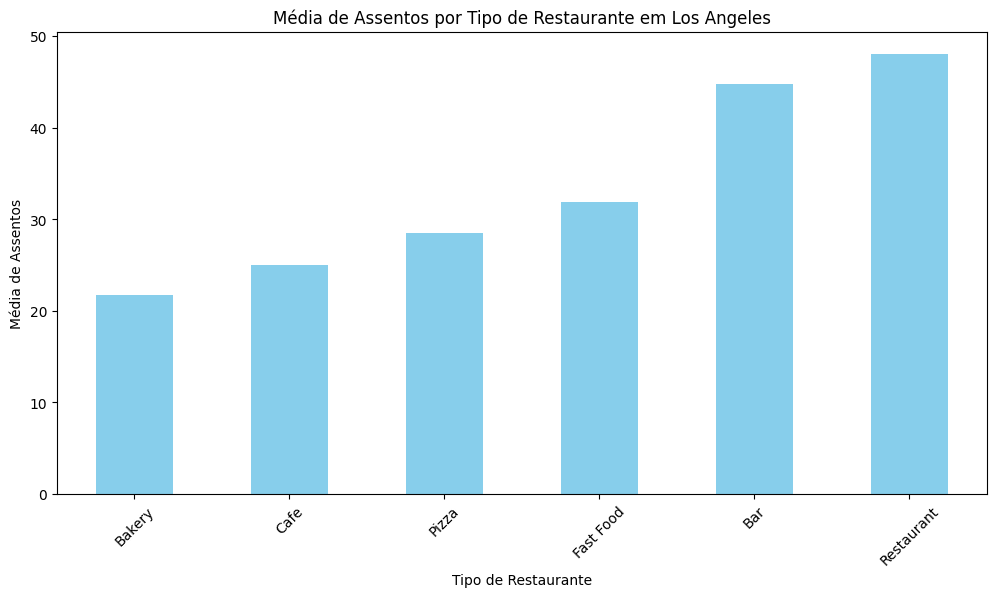

Média de Assentos por Tipo de Restaurante:
object_type
Bakery        21.773852
Cafe          25.000000
Pizza         28.459375
Fast Food     31.837711
Bar           44.767123
Restaurant    48.042316
Name: number, dtype: float64

Tipo de Restaurante com Maior Média de Assentos: Restaurant (48.04231564438319 assentos)


In [12]:
# Calcular a média de assentos para cada tipo de restaurante
mean_seats_per_type = cafe_df.groupby('object_type')['number'].mean().sort_values()

# Identificar o tipo de restaurante com maior média de assentos
max_mean_seats = mean_seats_per_type.idxmax()
max_mean_value = mean_seats_per_type.max()

# Plotando a média de assentos por tipo de restaurante
plt.figure(figsize=(12, 6))
mean_seats_per_type.plot(kind='bar', color='skyblue')
plt.title('Média de Assentos por Tipo de Restaurante em Los Angeles')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Média de Assentos')
plt.xticks(rotation=45)
plt.show()

print("Média de Assentos por Tipo de Restaurante:")
print(mean_seats_per_type)
print(f"\nTipo de Restaurante com Maior Média de Assentos: {max_mean_seats} ({max_mean_value} assentos)")

Com uma média de 25 assentos, as cafeterias estão na faixa inferior de capacidade em comparação a outros tipos de estabelecimentos, o que pode ser favorável para uma operação eficiente com garçons robôs. Com um bom planejamento da disposição de assentos de acordo com essas médias, é possível otimizar o uso do espaço e atender às expectativas dos clientes.

In [13]:
# Função para extrair o nome da rua
def extract_street_name(address):
    # Usar regex para extrair o nome da rua
    match = re.search(r'(\d+\s)(.*)', address)
    if match:
        return match.group(2).strip()
    return address

# Aplicando a função a coluna address para criar uma nova coluna street_name
cafe_df['street_name'] = cafe_df['address'].apply(extract_street_name)

print(cafe_df.head(10))

      id          object_name                          address  chain  \
0  11786  HABITAT COFFEE SHOP           3708 N EAGLE ROCK BLVD  False   
1  11787             REILLY'S                100 WORLD WAY 120  False   
2  11788       STREET CHURROS          6801 HOLLYWOOD BLVD 253  False   
3  11789    TRINITI ECHO PARK               1814 W SUNSET BLVD  False   
4  11790               POLLEN               2100 ECHO PARK AVE  False   
5  11791       THE SPOT GRILL              10004 NATIONAL BLVD  False   
6  11792                  CPK                100 WORLD WAY 126  False   
7  11793             PHO LALA            3500 W 6TH ST STE 226  False   
8  11794           ABC DONUTS  3027 N SAN FERNANDO RD UNIT 103   True   
9  11795             UPSTAIRS             3707 N CAHUENGA BLVD  False   

  object_type  number                 street_name  
0        Cafe      26           N EAGLE ROCK BLVD  
1  Restaurant       9               WORLD WAY 120  
2   Fast Food      20          HOLLYWOOD

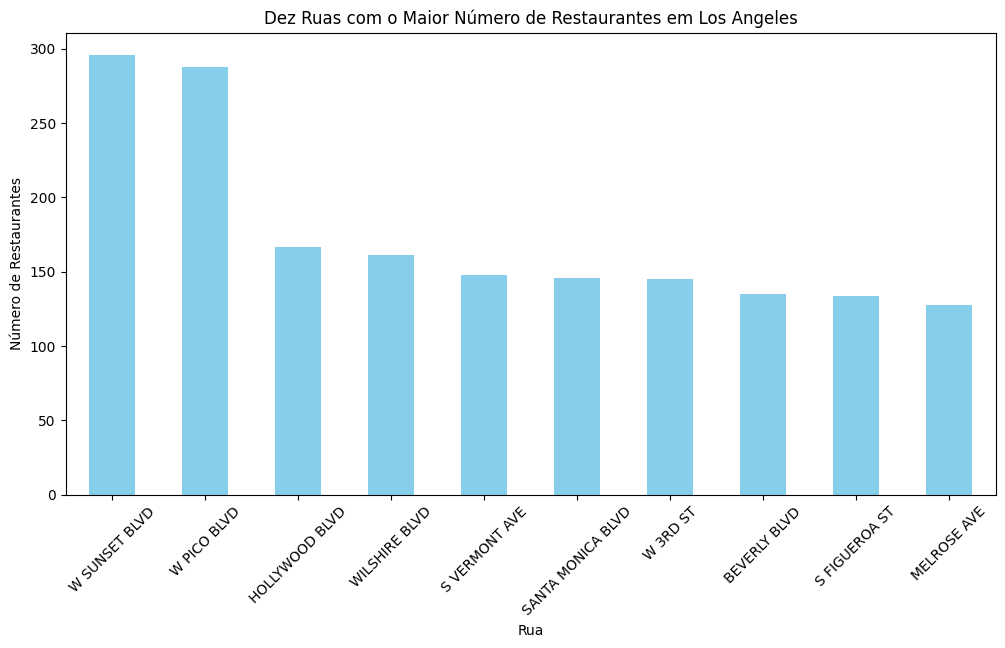

Dez ruas com o maior número de restaurantes:
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
MELROSE AVE          128
Name: street_name, dtype: int64


In [14]:
# Contando o número de restaurantes em cada rua
counting_streets = cafe_df['street_name'].value_counts()

# Selecionando as dez ruas com o maior número de restaurantes
top10_streets = counting_streets.head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
top10_streets.plot(kind='bar', color='skyblue')
plt.title('Dez Ruas com o Maior Número de Restaurantes em Los Angeles')
plt.xlabel('Rua')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.show()

print("Dez ruas com o maior número de restaurantes:")
print(top10_streets)

Isso fornece uma visão clara sobre as áreas mais densamente povoadas por restaurantes, o que pode ser útil para estratégias de marketing, localização de novos negócios, e outras análises.

In [15]:
# Filtrando as ruas que têm apenas um restaurante
streets_with_one_rest = counting_streets[counting_streets == 1]

# Contando o número de ruas que têm apenas um restaurante
streets_with_one_rest = len(streets_with_one_rest)

print("Número de ruas que têm apenas um restaurante:", streets_with_one_rest)

Número de ruas que têm apenas um restaurante: 2450


Isso indica que uma quantidade significativa de ruas em Los Angeles tem um único restaurante, o que pode representar oportunidades específicas para expandir a presença de novos estabelecimentos em áreas com pouca concorrência.

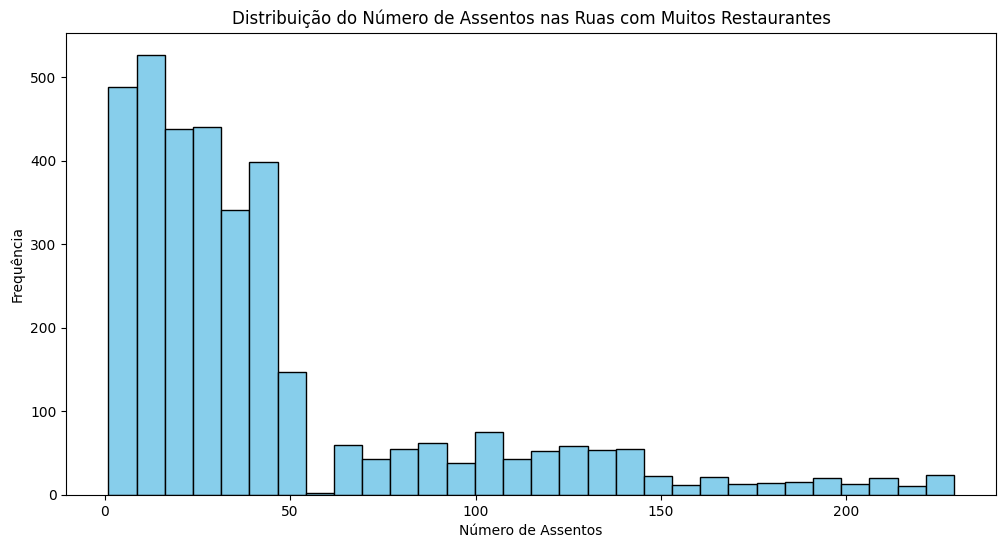

In [16]:
# Identificando as ruas com muitos restaurantes (por exemplo, mais de 50 restaurantes)
streets_with_many_rest = counting_streets[counting_streets > 50].index

# Filtrando os dados para essas ruas
streets_with_many_rest = cafe_df[cafe_df['street_name'].isin(streets_with_many_rest)]

# Analisando a distribuição do número de assentos nessas ruas
seats_distribution = streets_with_many_rest['number']

# Plotando a distribuição do número de assentos
plt.figure(figsize=(12, 6))
plt.hist(seats_distribution, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Número de Assentos nas Ruas com Muitos Restaurantes')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.show()

In [17]:
# Calculando estatísticas descritivas
estatisticas_descritivas = seats_distribution.describe()

print(estatisticas_descritivas)

count    3562.000000
mean       45.470241
std        47.710218
min         1.000000
25%        15.000000
50%        29.000000
75%        47.000000
max       229.000000
Name: number, dtype: float64


A predominância de pequenos restaurantes pode indicar uma preferência por locais mais íntimos ou restrições de espaço nas áreas densamente povoadas. A existência de poucos restaurantes grandes pode sugerir uma oportunidade de mercado para estabelecimentos maiores, especialmente se a demanda suportar tal capacidade. A variedade no número de assentos sugere uma diversidade na oferta de serviços, desde pequenos cafés até grandes restaurantes.

# Conclusões Gerais e Recomendações

Após diversas análises de mercado, podemos chegar em algumas importantes conclusões. Quanto a distribuição do tipo de estabelecimento, percebemos que restaurantes tradicionais (31.6%) e cafés (61.1%) dominam o mercado. Bares e padarias têm uma presença menor em comparação.

Cafés e fast foods têm alta proporção de redes, 61.1% e 56.8% respectivamente. Já restaurantes têm uma proporção menor de redes (31.6%). Restaurantes têm o maior número médio de assentos (48.0), seguidos por bares (44.8) e fast food (31.8). E padarias, cafés, e pizzarias tendem a ter menos assentos, com médias de 21.8, 25.0 e 28.5 respectivamente.

Considerando a alta proporção de redes de cafés e a popularidade do conceito, um café com garçons robôs pode atrair tanto pela novidade quanto pela eficiência. Os restaurantes tradicionais têm um número médio de assentos de 48.0, sugerindo que esse tamanho é bem aceito. Investir em um restaurante com essa capacidade pode equilibrar bem entre custos operacionais e capacidade de atendimento. Fast food é outra categoria com alta proporção de redes e pode se beneficiar da eficiência adicional dos garçons robôs. 

Considerando a distribuição de assentos nas ruas movimentadas, um número de assentos entre 25 a 50 parece ser ideal. Começar com um estabelecimento piloto, monitorar a aceitação e eficiência dos garçons robôs, e gradualmente expandir pode ser uma estratégia prudente. Aproveitar as ruas com menor concorrência (2450 ruas com apenas um restaurante) para abrir novos pontos, priorizando locais com fluxo alto de pessoas, como áreas comerciais ou próximas a escritórios. Usar a inovação dos garçons robôs como ponto principal de marketing para atrair curiosidade e mídia.

Um café com garçons robôs parece ser a opção mais promissora, especialmente com um número de assentos na faixa de 25 a 50. Há uma boa oportunidade para desenvolver uma rede, especialmente aproveitando ruas com menor concorrência e apostando em inovações tecnológicas para atrair e reter clientes.

# Apresentação

Presentation: <https://drive.google.com/file/d/1NGDHyVmAkfXOp1owxKzwCRXhbF3RNo4d/view?usp=drive_link>